# 1
A neural network takes in inputs and processes them through hidden layers using weights that are adjusted based on the learning process then gives an output.
Steps needed are frist preparing the data, then figure out what you want the network to do. Set up the network by telling it how many input nodes and output noddes you want. How many hidden layers you want, then then train it. Finally you evalute your network to see how it performs.

# 2
You can use accuracy, precision, recall, and F1 score to evalute. You can also use loss funtion. Loss funtion allows you to evaluate how worng the preditions are for the test network, the lower the loss the better the better the predictions. 

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

data = pd.read_csv("adult_data.csv")
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# 3

In [62]:
# drop missing values
data.dropna(inplace=True)

# encode into categorical variables
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

# normalize
scaler = StandardScaler()
numerical_columns = data.select_dtypes(include=['int', 'float']).columns
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

# make income into binary
data['income'] = data['income'].apply(lambda x: 1 if x == '>50K' else 0)

# test train split
X = data.drop('income', axis=1)
y = data['income']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=30)


data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,0.030671,2.150579,-1.063611,-0.335437,1.134739,0.921634,-1.317809,-0.277805,0.393668,0.703071,0.148453,-0.21666,-0.035429,0.291569,0
1,0.837109,1.463736,-1.008707,-0.335437,1.134739,-0.406212,-0.608387,-0.900181,0.393668,0.703071,-0.145920,-0.21666,-2.222153,0.291569,0
2,-0.042642,0.090050,0.245079,0.181332,-0.420060,-1.734058,-0.135438,-0.277805,0.393668,0.703071,-0.145920,-0.21666,-0.035429,0.291569,0
3,1.057047,0.090050,0.425801,-2.402511,-1.197459,-0.406212,-0.135438,-0.900181,-1.962621,0.703071,-0.145920,-0.21666,-0.035429,0.291569,0
4,-0.775768,0.090050,1.408176,-0.335437,1.134739,-0.406212,0.810458,2.211698,-1.962621,-1.422331,-0.145920,-0.21666,-0.035429,-4.054223,0


# 4

In [63]:
pip install torch torchvision torchaudio


Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [64]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

Epoch number: 1 with loss: 0.7464441061019897
Epoch number: 11 with loss: 0.6898186802864075
Epoch number: 21 with loss: 0.6362981796264648
Epoch number: 31 with loss: 0.5841954946517944
Epoch number: 41 with loss: 0.5320701003074646
Epoch number: 51 with loss: 0.4794453978538513
Epoch number: 61 with loss: 0.4263823628425598
Epoch number: 71 with loss: 0.3733671009540558
Epoch number: 81 with loss: 0.3212827146053314
Epoch number: 91 with loss: 0.27130940556526184
Epoch number: 101 with loss: 0.22482790052890778
Epoch number: 111 with loss: 0.18305198848247528
Epoch number: 121 with loss: 0.14688150584697723
Epoch number: 131 with loss: 0.1166486069560051
Epoch number: 141 with loss: 0.09220193326473236
Epoch number: 151 with loss: 0.07298451662063599
Epoch number: 161 with loss: 0.05817317217588425
Epoch number: 171 with loss: 0.04685864597558975
Epoch number: 181 with loss: 0.03821856901049614
Epoch number: 191 with loss: 0.03157763555645943
Epoch number: 201 with loss: 0.0264240615

/Users/kevinpatel/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:386: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


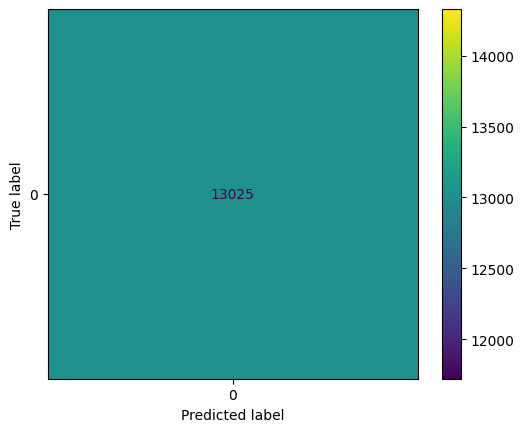

In [65]:
X_train = torch.FloatTensor(X_train.values)
X_test = torch.FloatTensor(X_test.values)
y_train = torch.LongTensor(y_train.values)
y_test = torch.LongTensor(y_test.values)


class ANN_Model(nn.Module):
    def __init__(self, input_features, hidden1, hidden2, out_features):
        super().__init__()
        self.layer_1_connection = nn.Linear(input_features, hidden1)
        self.layer_2_connection = nn.Linear(hidden1, hidden2)
        self.out = nn.Linear(hidden2, out_features)

    def forward(self, x):
        x = F.relu(self.layer_1_connection(x))
        x = F.relu(self.layer_2_connection(x))
        x = self.out(x)
        return x

input_features = X_train.shape[1]
hidden1 = 10
hidden2 = 10
out_features = 2  
ann = ANN_Model(input_features, hidden1, hidden2, out_features)

loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(ann.parameters(), lr=0.001)

final_loss = []
n_epochs = 500
for epoch in range(n_epochs):
    y_pred = ann.forward(X_train)
    loss = loss_function(y_pred, y_train)
    final_loss.append(loss)

    if epoch % 10 == 1:
        print(f'Epoch number: {epoch} with loss: {loss}')

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


y_pred = []
with torch.no_grad():
    for data in X_test:
        prediction = ann(data)
        y_pred.append(prediction.argmax().item())

print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
